In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model preprocessing later
from sklearn.preprocessing import StandardScaler
# Put all needed libraries here.
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
df = pd.read_csv('/content/creditcard.csv')


In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [ ]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Load your dataset again
df = pd.read_csv('/content/creditcard.csv')

# Check if 'Amount' column exists
if 'Amount' not in df.columns:
    raise KeyError("The 'Amount' column is not found in the DataFrame. Please check your data.")

# Now proceed with scaling
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)



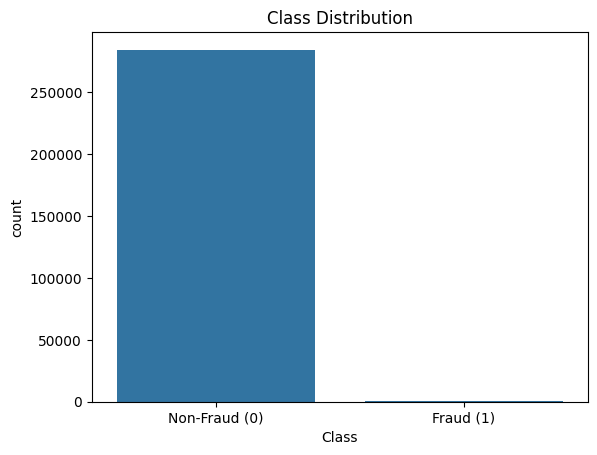

Fraudulent transactions: 0.1727%


In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

fraud_percentage = round(df['Class'].value_counts(normalize=True)[1] * 100, 4)
print(f"Fraudulent transactions: {fraud_percentage}%")


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Class
0    284315
1       492
Name: count, dtype: int64


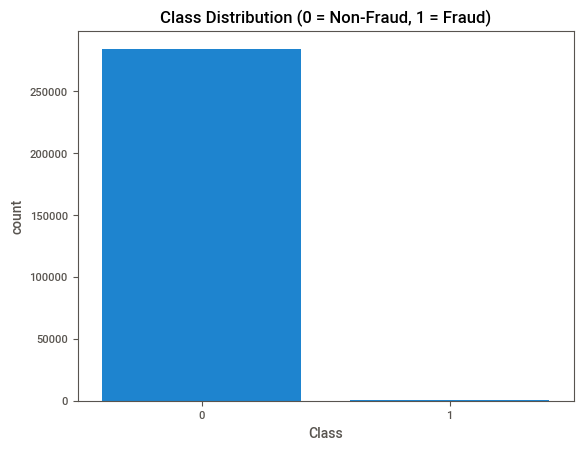

In [ ]:
print(df.columns)

if 'Class' in df.columns:
    print(df['Class'].value_counts())
    sns.countplot(data=df, x='Class')
elif 'class' in df.columns:
    print(df['class'].value_counts())
    sns.countplot(data=df, x='class')
    df = df.rename(columns={'class': 'Class'})
else:
    print("Neither 'Class' nor 'class' column found in the DataFrame.")

plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3= df.quantile (0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any (axis=1)
print (outliers)

0         False
1         False
2          True
3         False
4         False
          ...  
284802     True
284803    False
284804     True
284805     True
284806     True
Length: 284807, dtype: bool


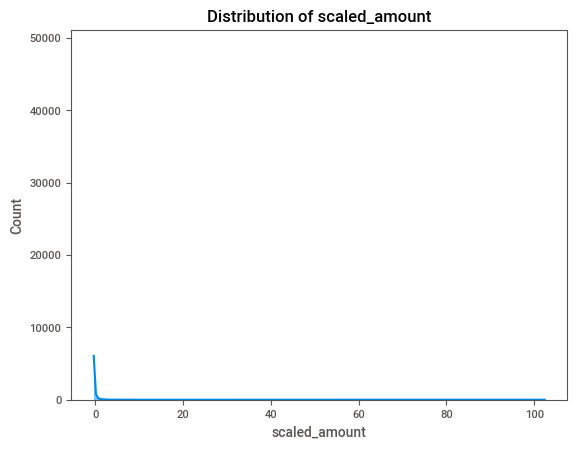

In [ ]:
# Previous code...
# Assuming you have loaded the creditcard.csv data into df earlier
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure you are using the updated DataFrame from cell 5
df = pd.read_csv('/content/creditcard.csv')

# Check if 'Amount' column exists
if 'Amount' not in df.columns:
    raise KeyError("The 'Amount' column is not found in the DataFrame. Please check your data.")

# Now proceed with scaling
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Now continue with your plotting in cell 21 and use this updated df
sns.histplot(data=df, x='scaled_amount', kde=True)
plt.title('Distribution of scaled_amount')
plt.show()

# Subsequent code...

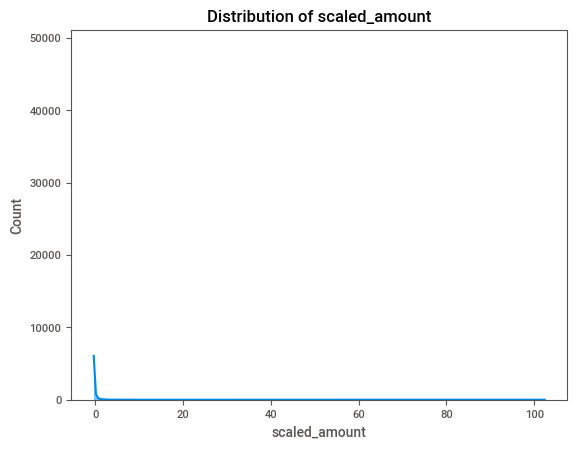

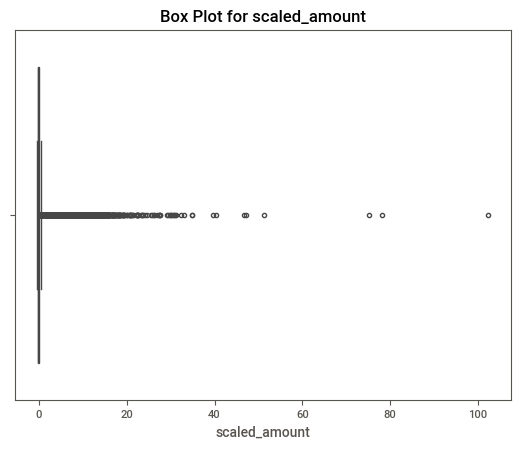

Class
0    284315
1       492
Name: count, dtype: int64


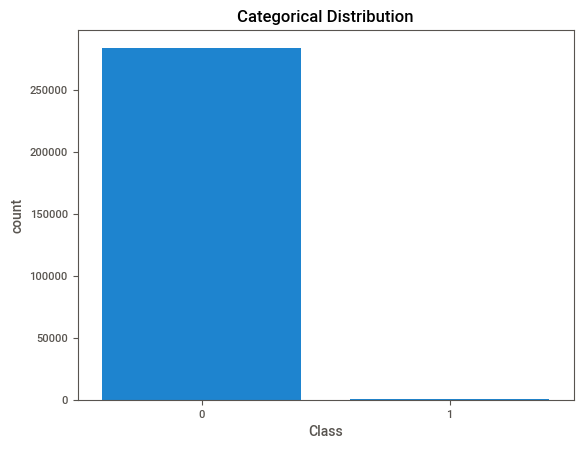

In [ ]:
sns.histplot(data=df, x='scaled_amount', kde=True)
plt.title('Distribution of scaled_amount')
plt.show()
sns.boxplot(x=df['scaled_amount'])
plt.title('Box Plot for scaled_amount')
plt.show()
print(df['Class'].value_counts())
sns.countplot(data=df, x='Class')
plt.title('Categorical Distribution')
plt.show()

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade sweetviz
import pandas as pd
import sweetviz as sv

# Load Data
df = pd.read_csv('/content/creditcard.csv')

# Generate SweetViz Report
report = sv.analyze(df)
report.show_html('sweetviz_report.html') # Generates an interactive HTML report

In [ ]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


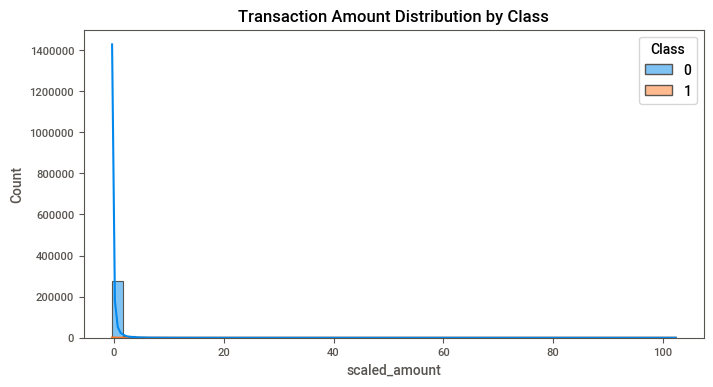

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='scaled_amount', hue='Class', bins=50, kde=True)
plt.title('Transaction Amount Distribution by Class')
plt.show()


In [ ]:
skew_vals = df.drop('Class', axis=1).skew()
kurt_vals = df.drop('Class', axis=1).kurt()

print("Top skewed features:\n", skew_vals.sort_values(ascending=False).head())
print("\nTop kurtotic features:\n", kurt_vals.sort_values(ascending=False).head())


Top skewed features:
 Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
dtype: float64

Top kurtotic features:
 V28       933.397502
Amount    845.092646
V23       440.088659
V7        405.607417
V20       271.016113
dtype: float64


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [ ]:
X_train.shape

(454904, 30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

nn_clf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_clf.fit(
    X_train, y_train,
    epochs=15,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5954 - loss: 120.6491 - val_accuracy: 0.7861 - val_loss: 12.4581
Epoch 2/15
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7884 - loss: 9.3752 - val_accuracy: 0.9024 - val_loss: 0.7875
Epoch 3/15
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8442 - loss: 9.2121 - val_accuracy: 0.9518 - val_loss: 1.2526
Epoch 4/15
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8839 - loss: 5.4784 - val_accuracy: 0.8425 - val_loss: 17.1396
Epoch 5/15
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9036 - loss: 6.3666 - val_accuracy: 0.9573 - val_loss: 1.5656


In [ ]:
# Make predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_nn = (nn_clf.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

print(" Neural Network Classifier Performance:")
print(f"Accuracy: {nn_accuracy:.2f}, Precision: {nn_precision:.2f}, Recall: {nn_recall:.2f}, F1-score: {nn_f1:.2f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
 Neural Network Classifier Performance:
Accuracy: 0.90, Precision: 0.84, Recall: 0.99, F1-score: 0.91


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

<Figure size 800x500 with 0 Axes>

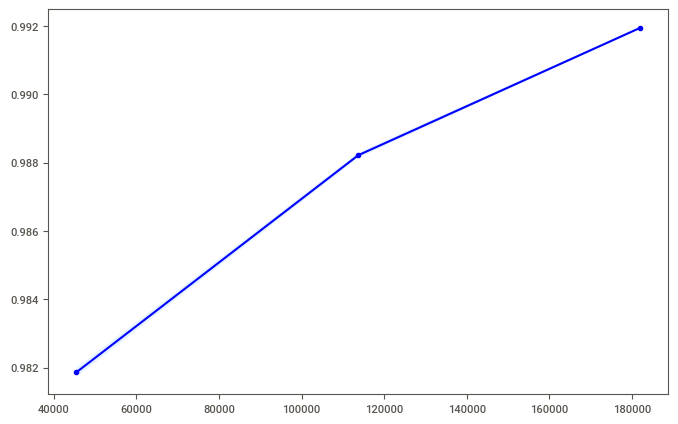

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Neural Network (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    solver='sgd',
    learning_rate='adaptive',
    random_state=42
)

# Scale X_train and X_test
scaler = StandardScaler() #
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_sizes, train_scores, val_scores = learning_curve(
    mlp,
    X_train_scaled,
    y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=np.linspace(0.2, 0.8, 3),
    shuffle=True,
    random_state=42
)

# Mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Neural Network (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    solver='sgd',
    learning_rate='adaptive',
    random_state=42
)

# Scale X_train and X_test
scaler = StandardScaler() # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform X_train
X_test_scaled = scaler.transform(X_test)

train_sizes, train_scores, val_scores = learning_curve(
    mlp,
    X_train_scaled,
    y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=np.linspace(0.2, 0.8, 3),
    shuffle=True,
    random_state=42
)

# Mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Train", marker='o', color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)